In [1]:
!pip install pandas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

# Import parameters
url = 'https://raw.githubusercontent.com/jxx123/simglucose/master/simglucose/params/vpatient_params.csv'
df = pd.read_csv(url)
df

,Name,i,x0_ 1,x0_ 2,x0_ 3,x0_ 4,x0_ 5,x0_ 6,x0_ 7,x0_ 8,...,kd,ksc,ka1,ka2,dosekempt,u2ss,isc1ss,isc2ss,kp1,patient_history
0,adolescent#001,1,0,0,0,250.621836,176.506560,4.697518,0,97.554000,...,0.0185,0.0560,0.0025,0.0115,90000,1.216976,57.951224,93.225883,11.504823,0
1,adolescent#002,2,0,0,0,280.236267,30.954131,6.019305,0,119.180000,...,0.0163,0.1314,0.0068,0.0269,90000,1.798300,77.848476,47.172125,4.196579,0
2,adolescent#003,3,0,0,0,326.553380,383.368339,3.487881,0,101.280000,...,0.0149,0.1059,0.0030,0.0148,90000,1.446266,80.796984,81.342909,6.588789,0
3,adolescent#004,4,0,0,0,248.117090,214.758608,4.316765,0,108.880000,...,0.0155,0.0751,0.0026,0.0121,90000,1.762633,97.383030,124.746857,6.041685,0
4,adolescent#005,5,0,0,0,279.047113,144.715759,5.162898,0,113.090000,...,0.0151,0.0866,0.0032,0.0177,90000,1.534645,83.860398,71.541921,4.642232,0
5,adolescent#006,6,0,0,0,257.421705,162.558571,8.154419,0,113.000000,...,0.0180,0.0737,0.0061,0.0273,90000,1.927878,79.994952,52.743925,7.665231,0
6,adolescent#007,7,0,0,0,238.918844,87.961590,5.234234,0,111.900000,...,0.0176,0.0503,0.0041,0.0188,90000,2.049148,94.430770,88.403274,6.422606,0
7,adolescent#008,8,0,0,0,263.838120,33.927415,4.730161,0,82.914000,...,0.0174,0.0804,0.0035,0.0149,90000,1.353241,64.748395,75.612219,4.325662,0
8,adolescent#009,9,0,0,0,241.447500,184.846173,4.707833,0,84.982000,...,0.0167,0.0912,0.0027,0.0113,90000,1.381865,71.230166,105.269360,9.971336,0
9,adolescent#010,10,0,0,0,267.183741,169.711073,6.321865,0,108.240000,...,0.0144,0.1045,0.0034,0.0173,90000,1.661090,93.319683,77.676499,5.084551,0


In [3]:
# Rename columns
df = df.rename(columns={
    'Name': 'Patient ID',
    'x0_ 1': 'Qsto1_init',
    'x0_ 2': 'Qsto2_init',
    'x0_ 3': 'Qgut_init',
    'x0_ 4': 'Gp_init',
    'x0_ 5': 'Gt_init',
    'x0_ 6': 'Ip_init',
    'x0_ 7': 'X_init',
    'x0_ 8': 'I1_init',
    'x0_ 9': 'Id_init',
    'x0_10': 'Il_init',
    'x0_11': 'Isc1_init',
    'x0_12': 'Isc2_init',
    'x0_13': 'Gsub_init',
    'Fsnc': 'Fcns',
    'm30': 'm3'
})

# Drop unused columns
unused_columns = ['i', 'EGPb', 'Gb', 'Ipb', 'm5', 'CL', 'HEb', 'Ilb',  'Gpb', 'Gtb', 
                  'dosekempt', 'isc1ss', 'isc2ss', 'Rdb', 'PCRb', 'patient_history']
df = df.drop(unused_columns, axis=1)

df.columns

Index(['Patient ID', 'Qsto1_init', 'Qsto2_init', 'Qgut_init', 'Gp_init',
       'Gt_init', 'Ip_init', 'X_init', 'I1_init', 'Id_init', 'Il_init',
       'Isc1_init', 'Isc2_init', 'Gsub_init', 'BW', 'Ib', 'kabs', 'kmax',
       'kmin', 'b', 'd', 'Vg', 'Vi', 'Vmx', 'Km0', 'k2', 'k1', 'p2u', 'm1',
       'm2', 'm4', 'm3', 'ki', 'kp2', 'kp3', 'f', 'ke1', 'ke2', 'Fcns', 'Vm0',
       'kd', 'ksc', 'ka1', 'ka2', 'u2ss', 'kp1'],
      dtype='object')

In [4]:
# Reorder columns
reordered_columns = ['Patient ID', 'Qsto1_init', 'Qsto2_init', 'Qgut_init', 'Gp_init',
       'Gt_init', 'Ip_init', 'Id_init', 'I1_init', 'Il_init','X_init', 
       'Isc1_init', 'Isc2_init', 'Gsub_init', 'BW', 'Ib', 'kabs', 'kmax',
       'kmin', 'b', 'd', 'Vg', 'Vi', 'Vmx', 'Km0', 'k1', 'k2', 'p2u', 'm1',
       'm2', 'm3', 'm4', 'ki', 'kp1', 'kp2', 'kp3', 'f', 'ke1', 'ke2', 'Fcns',
       'Vm0', 'kd', 'ksc', 'ka1', 'ka2', 'u2ss' ]
df = df[reordered_columns]

In [5]:
# State initialization

# Get patient states given patient ID and parameter name (key)
def value (pt:str, key:str):
    return df.loc[df['Patient ID'] == pt, key].values[0]

pt = 'adult#001'

# Define a dictionary to map keys to variable names
key_to_varname = {
    'BW': 'BW', 
    'Qsto1_init': 'Qsto1', 
    'Qsto2_init': 'Qsto2', 
    'Qgut_init': 'Qgut', 
    'Gp_init': 'Gp', 
    'Gt_init': 'Gt', 
    'Ip_init': 'Ip', 
    'X_init': 'X', 
    'I1_init': 'I1', 
    'Id_init': 'Id', 
    'Il_init': 'Il', 
    'Isc1_init': 'Isc1', 
    'Isc2_init': 'Isc2', 
    'Gsub_init': 'Gsub'
}

for key, var_name in key_to_varname.items():
    # Fetch the value
    val = value(pt, key)
    
    # Assign the value to the variable
    exec(f"{var_name} = {val}")

    # Print the value
    print(f'{var_name}: {val}')



BW: 102.32
Qsto1: 0
Qsto2: 0
Qgut: 0
Gp: 265.370112
Gt: 162.457097269
Ip: 5.5043265
X: 0
I1: 100.25
Id: 100.25
Il: 3.20762505142
Isc1: 72.4341762342
Isc2: 141.153779328
Gsub: 265.370112


In [6]:
# Get the parameter values
keys = ['b', 'd', 'f', 'kmax', 'kmin', 'kabs', 'kp1', 'kp2', 'kp3', 
        'Fcns', 'ke1', 'ke2', 'k1', 'k2', 'Vm0', 'Vmx', 'Km0', 'm1', 
        'm2', 'm3', 'm4', 'ka1', 'ka2', 'Vi', 'p2u', 'Ib', 'ki', 'kd', 'ksc', 'u2ss']

for key in keys:
    # Fetch the value
    val = value(pt, key)
    
    # Assign the value to the variable
    exec(f"{key} = {val}")

    # Print the value
    print(f'{key}: {val}')

b: 0.70391
d: 0.21057
f: 0.9
kmax: 0.046122
kmin: 0.0037927
kabs: 0.08906
kp1: 4.73140582528
kp2: 0.00469
kp3: 0.01208
Fcns: 1
ke1: 0.0005
ke2: 339
k1: 0.058138
k2: 0.087114
Vm0: 3.2667306607
Vmx: 0.031319
Km0: 253.52
m1: 0.15446
m2: 0.225027424083
m3: 0.23169
m4: 0.090010969633
ka1: 0.0019
ka2: 0.0078
Vi: 0.054906
p2u: 0.027802
Ib: 100.25
ki: 0.0046374
kd: 0.0152
ksc: 0.0766
u2ss: 1.2386244136


In [7]:
def step(i, insulin, glucose_intake, Qsto1=None, Qsto2=None, Qgut=None, Gp=None, Gt=None, Ip=None, X=None, Id=None, I1=None, Il=None, Isc1=None, Isc2=None, Gsub=None):
    
    if i == 0 and glucose_intake != 0:
        D = glucose_intake
    else: D = 0.0000001  # Prevent division by zero
    
    basal = u2ss * BW / 6000  # U/min

    if insulin > basal:
        insulin = insulin * 6000 / BW  # U/min -> pmol/kg/min
    else:
        insulin = u2ss
        
    # Glucose rate of appearance
    Qsto = Qsto1 + Qsto2
    Qsto1 = Qsto1 - kmax * Qsto1 + D
    alpha = 5 / (2 * D * (1 - b))
    beta = 5 / (2 * D * d)
    kempt = kmin + 0.5*(kmax - kmin)*(np.tanh(alpha*(Qsto - b*D)) - np.tanh(beta*(Qsto - d*D)) + 2)
    Qsto2 = Qsto2 - kempt * Qsto2 + kmax * Qsto1
    Qgut = Qgut - kabs * Qgut + kempt * Qsto2
    Ra = f * kabs * Qgut / BW

    # Glucose production
    EGP = kp1 - kp2 * Gp - kp3 * Id

    # Glucose utilization
    Uii = Fcns

    # Renal excretion
    if Gp > ke2:
        E = ke1 * (Gp - ke2)
    else:
        E = 0

    # Glucose kinetics
    Gp = Gp + max(EGP, 0) + Ra - Uii - E - k1 * Gp + k2 * Gt
    if Gp < 0: Gp = 0
    Vm = Vm0 + Vmx * X
    Uid = Vm * Gt / (Km0 + Gt)
    Gt = Gt - Uid + k1 * Gp - k2 * Gt
    if Gt < 0: Gt = 0

    # Insulin kinetics
    Ip = Ip - (m2 + m4) * Ip + m1 * Il + ka1 * Isc1 + ka2 * Isc2
    if Ip < 0: Ip = 0
    I = Ip / Vi
    
    # Insulin action on glucose utilization
    X = X - p2u * X + p2u * (I - Ib)
    if X < 0: X = 0

    # Insulin action on production
    I1 = I1 -ki * (I1 - I)
    Id = Id - ki * (Id - I1)

    # Insulin in the liver (pmol/kg)
    Il = Il -(m1 + m3) * Il + m2 * Ip
    if Il < 0: Il = 0

    # Subcutaneous insulin kinetics
    Isc1 = Isc1 + insulin - (ka1 + kd) * Isc1
    if Isc1 < 0: Isc1 = 0

    Isc2 = Isc2 + kd * Isc1 - ka2 * Isc2
    if Isc2 < 0: Isc2 = 0

    # Subcutaneous glucose
    Gsub = Gsub + (-ksc * Gsub + ksc * Gp)
    if Gsub < 0: Gsub = 0
    
    return {
        'Qsto1': Qsto1, 
        'Qsto2': Qsto2, 
        'Qgut': Qgut,
        'Gp': Gp, 
        'Gt': Gt, 
        'Ip': Ip, 
        'X': X, 
        'I1': I1,
        'Id': Id,
        'Il': Il, 
        'Isc1': Isc1,
        'Isc2': Isc2,
        'Gsub': Gsub
    }


In [8]:
kwargs = {'Qsto1': Qsto1, 'Qsto2': Qsto2, 'Qgut': Qgut, 'Gp': Gp, 'Gt': Gt, 'Ip': Ip, 
          'X': X, 'I1': I1, 'Id': Id, 'Il': Il, 'Isc1': Isc1, 'Isc2': Isc2, 'Gsub': Gsub}

[265.370112, 265.376455173512, 265.39990024832184, 265.45397300544266, 265.5537106379987, 265.71464067198644, 265.95201609244975, 266.2802546361884, 266.7125409664029, 267.26055847431076, 267.9343236829759, 268.7421011952329, 269.6903811580215, 270.7839045223065, 272.0257241080996, 273.41729174557736, 274.95856363846065, 276.64811765018095, 278.48327750011106, 280.46023992016313, 282.57420169789543, 284.81948425151154, 287.18965397048555, 289.6776370346204, 292.2758278123379, 294.9761902512249, 297.77035192318885, 300.6496905838351, 303.6054132599394, 306.6286189532773, 309.7102356309297, 312.8412362460067, 316.01268745866537, 319.2157925696014, 322.4419290044812, 325.6826807036139, 328.9298657781217, 332.1755597938533, 335.41211503885086, 338.6321761206152, 341.8286922267657, 344.99492636781696, 348.1244619043929, 351.21120664383125, 354.2493947732481, 357.2335868780942, 360.15866827732225, 363.01984588872017, 365.8126438209089, 368.53289787209064, 371.1767490999433, 373.7406366121554

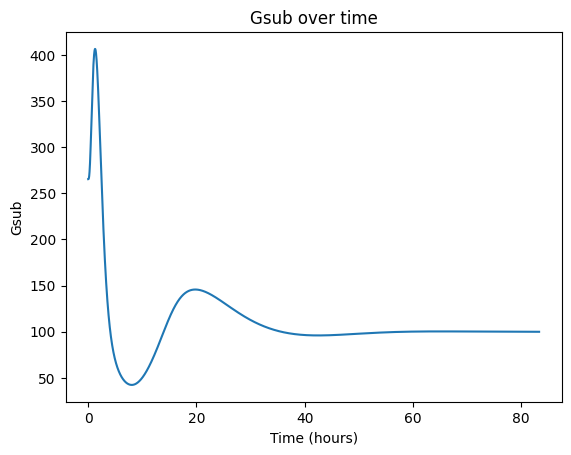

In [9]:
# PID control
import matplotlib.pyplot as plt
import numpy as np

N = 5000
state_name = 'Gsub'

state_dicts = [kwargs]  # a list to store state dictionaries
sum_error = 0
diff_error = 0
pre_error = 0
Kp = 0.0003  # 0.0003
Ki = 0.0000008 # 0.0000008
Kd = 0.06 # 0.06
target = 100
insulin = 0
glucose_intake = 50000  # valid only when i = 0 (mg)
time_minutes = np.arange(N)  # array to store time in minutes

for i in range(N-1):
    state_dict = step(i, insulin, glucose_intake, **kwargs)
    Gsub = state_dict['Gsub']
    error = Gsub - target
    diff_error = error - pre_error
    sum_error += error

    insulin = Kp * error + Ki * sum_error + Kd * diff_error
    if insulin < 0:
        insulin = 0
    
    state_dicts.append(state_dict)
    kwargs = state_dict  # update kwargs with the new state for the next iteration
    pre_error = error

# After the loop, extract Gsub values from state_dicts into a list
state_values = [d[state_name] for d in state_dicts]
print (state_values)

# Convert time from minutes to hours
time_hours = time_minutes / 60

# Now plot
plt.plot(time_hours, state_values)
plt.title(f'{state_name} over time')
plt.xlabel('Time (hours)')
plt.ylabel(state_name)
plt.show()


